#### import libraries

In [149]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

#### Dataset

In [120]:
Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]
Prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]

In [121]:
# random sample size of 10
bdrm_price_tuple = list(zip(Bedrooms,Prices))
bdrm_price_df = pd.DataFrame(bdrm_price_tuple, columns =['Bedrooms', 'Prices'])
bdrm_price_df_10 =bdrm_price_df.sample(10)
bdrm_price_df_10

,Bedrooms,Prices
0,1,120
4,2,148
18,5,396
3,2,185
8,3,244
11,3,280
1,1,133
6,2,192
14,4,312
2,1,139


In [122]:
Bedroom_xample_10 = np.array(bdrm_price_df_10['Bedrooms'])
price_Xample_10 =np.array (bdrm_price_df_10['Prices'])
print(Bedroom_xample_10)
print(price_Xample_10)

[1 2 5 2 3 3 1 2 4 1]
[120 148 396 185 244 280 133 192 312 139]


#### standard deviation and mean of the sample

In [123]:
#mean and standard deviation of the sample 
# mean of the sample
xample_mean = np.mean(Bedroom_xample_10)
print(f"mean of the sample is: {np.mean(xample_mean)}")

# standard devition of the sample
xample_std = np.std(Bedroom_xample_10)
print(f"Standard deviation of the sample is: {xample_std :.4f}")

mean of the sample is: 2.4
Standard deviation of the sample is: 1.2806


#### mean  and standard deviation of the population

In [124]:
# mean of the sample
populatn_mean = np.mean(Bedrooms)
print(f"mean of the population is: {np.mean(Bedrooms)}")

# standard devition of the sample
populatn_std = np.std(Bedrooms)
print(f"Standard deviation of the population is: {np.std(Bedrooms)}") #:.4f

mean of the population is: 3.0
Standard deviation of the population is: 1.3416407864998738


#### confidence interval of 95% using the sample
#### Note: Z_value for a confidence interval of 95% is 1.96

In [125]:
z_value = 1.95

In [126]:
LCL_s = xample_mean-z_value*(xample_std/np.sqrt(10))
UCL_s = xample_mean+z_value*(xample_std/np.sqrt(10))
print(f"The lower class limit of CI for the sample is: {LCL_s :.4f}")
print(f"The upper class limit of CI for the sample is: {UCL_s :.4f}")

The lower class limit of CI for the sample is: 1.6103
The upper class limit of CI for the sample is: 3.1897


Observation:
    The population mean = 3.0 lies between the UCL_s and the LCL_s which is 3.46 and 2.14 respectively

#### Compute the Covariance and the correlation between the two variables

In [127]:
print(bdrm_price_df.shape)
bdrm_price_df.head()

(20, 2)


,Bedrooms,Prices
0,1,120
1,1,133
2,1,139
3,2,185
4,2,148


In [128]:
bdrm_price_df.cov() # covariance matrix

,Bedrooms,Prices
Bedrooms,1.894737,133.894737
Prices,133.894737,10016.155263


In [129]:
bdrm_price_df.corr() # Correlation matrix

,Bedrooms,Prices
Bedrooms,1.000000,0.971938
Prices,0.971938,1.000000


#### Covariance heat map

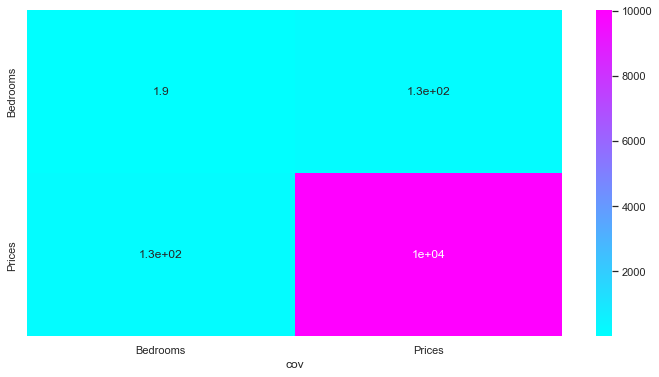

In [138]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(bdrm_price_df.cov(), annot=True,cmap=plt.cm.cool)
#plt.tight_layout()
plt.xlabel('cov')
plt.show()

#### Correlation heat map

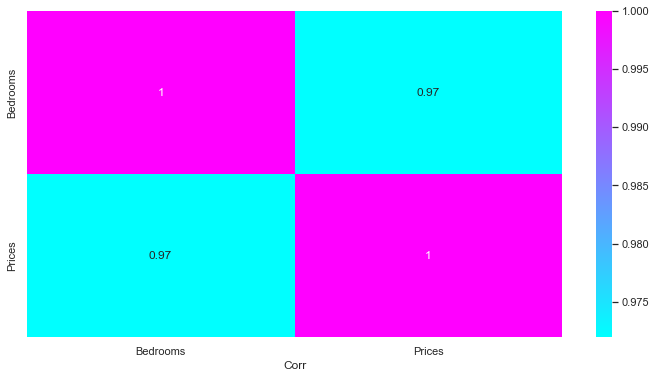

In [137]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(bdrm_price_df.corr(), annot=True,cmap=plt.cm.cool)
#plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [140]:
covr = bdrm_price_df.cov()
covr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Bedrooms,Prices
Bedrooms,1.89,133.89
Prices,133.89,10016.16


#### Build a regression model 

In [14]:
x = np.array(Bedrooms).reshape(-1, 1)
y = np.array(Prices)

In [92]:
y_mean=np.mean(y)
y_mean

251.45

In [15]:
model = LinearRegression().fit(x,y)

In [16]:
coeff_det = model.score(x,y)
print(f"The coefficient of determination is: {coeff_det :.4f}")

model_intcpt = round(model.intercept_, 4)
print(f"The intercept of the model is: {model_intcpt :.4f}")

model_slope = round(model.coef_[0], 4)
print(f"The slope of the model is: {model_slope :.4f}")

y_hat = model.predict(x).round(4)
print(f"the predicted prices by the model is: {y_hat}")
print(f"the true price of the house is: {y}")

The coefficient of determination is: 0.9447
The intercept of the model is: 39.4500
The slope of the model is: 70.6667
the predicted prices by the model is: [110.1167 110.1167 110.1167 180.7833 180.7833 180.7833 180.7833 251.45
 251.45   251.45   251.45   251.45   251.45   251.45   322.1167 322.1167
 322.1167 392.7833 392.7833 463.45  ]
the true price of the house is: [120 133 139 185 148 160 192 205 244 213 236 280 275 273 312 311 304 415
 396 488]


In [64]:
y_hat_series = pd.Series(list(y_hat))
predictn_check_df = pd.concat([bdrm_price_df,y_hat_series], axis = 1)
predictn_check_df.rename(columns={0: 'price_pred'}, inplace = True)
predictn_check_df

,Bedrooms,Prices,price_pred
0,1,120,110.1167
1,1,133,110.1167
2,1,139,110.1167
3,2,185,180.7833
4,2,148,180.7833
5,2,160,180.7833
6,2,192,180.7833
7,3,205,251.4500
8,3,244,251.4500
9,3,213,251.4500


#### The Price for a house with 7 rooms

In [26]:
No_of_rooms = new_value = 7
Price_7_rooms = model_slope* No_of_rooms + model_intcpt
print(f"The predicted price of a house with 7 rooms is: {Price_7_rooms :.4f}")

The predicted price of a house with 7 rooms is: 534.1169


#### Compute the upper and lower bound of the prediction interval of a house with 7 rooms

In [118]:
alpha=0.1
n = len(x)
df=2

re = np.sqrt(np.square(y-y_hat).sum()/(n-2))  
se = re * np.sqrt((1+(1/n)+((np.square(new_value-x.mean()))/(np.square(x-x.mean()).sum()))))

t_value = t.ppf(1-alpha/2, df=df)
interval = t_value * se

y_pred = model.predict(np.array([[new_value]]))[0].round(4)
LCL =  round(y_pred - interval, 4)
UCL =  round(y_pred + interval, 4)

print('the prediction %f with %d confidence lies between [%f, %f]'%(y_pred, (1-alpha/2)*100, LCL, UCL))

the prediction 534.116700 with 95 confidence lies between [447.775500, 620.457900]


#### Get the sample of houses with 3 Bedroom

In [65]:
three_bedrm_df = predictn_check_df[predictn_check_df['Bedrooms']==3]
three_bedrm_df

,Bedrooms,Prices,price_pred
7,3,205,251.45
8,3,244,251.45
9,3,213,251.45
10,3,236,251.45
11,3,280,251.45
12,3,275,251.45
13,3,273,251.45


In [63]:
three_bedrm_list = three_bedrm_df['Bedrooms'].to_list()
three_bedrm_price = three_bedrm_df['Prices'].to_list()
print(three_bedrm_list)
three_bedrm_price

[3, 3, 3, 3, 3, 3, 3]


[205, 244, 213, 236, 280, 275, 273]

#### To Evaluate the lowest price that can be paid for a 3 bedroom using TI

In [162]:
from scipy.stats import chi2
from scipy.stats import norm

In [163]:
x0 = 3
n3 = len(three_bedrm_list)
dof = n3-2

prop_d = 0.95
prop_inv = (1.0-prop_d) / 2.0
gauss_critical = norm.isf(prop_inv)
print('Gaussian critical value (z-Value): %.3f (coverage=%d%%)' % (gauss_critical, prop_d*100))

#specify confidence
prob_c = 0.99
chi_critical = chi2.isf(q=prob_c, df=dof)
print('Chi-Squared critical value (confidence interval): %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob_c*100, dof))

#tolerance
tolerance_interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % tolerance_interval)

#summarize
data_mean = mean(three_bedrm_price)
lb_price, ub_price = data_mean-tolerance_interval3,data_mean+tolerance_interval3
print('I am %d%% confidence that %d%% of data lies between %.2f to %.2f' % (prob_c*100, prop_d*100, lb_price, ub_price))

Gaussian critical value (z-Value): 1.960 (coverage=95%)
Chi-Squared critical value (confidence interval): 0.554 (prob=99%, dof=5)


NameError: name 'sqrt' is not defined

#### Extra Stuff

In [165]:
import numpy as np
from scipy.stats import t

# Sample data
bedrooms = np.array([1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6])
prices = np.array([120, 133, 139, 185, 148, 160, 192, 205, 244, 213, 236, 280, 275, 273, 312, 311, 304, 415, 396, 488])
x0 = 3  # Specific value of predictor variable

# Extract a sample of houses with 3 bedrooms
sample = prices[bedrooms == x0]
n = len(sample)

# Compute mean and standard deviation of the sample
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Compute sum of squares for predictor variable
SSx = np.sum((bedrooms - np.mean(bedrooms))**2)

# Compute standard error of response variable
Syx = np.sqrt(np.sum((sample - sample_mean)**2)/(n-2))

# Compute t-critical value
alpha = 0.1
df = n-2
t_crit = t.ppf(1-alpha/2, df)

# Compute prediction interval
x_bar = np.mean(bedrooms)
SE_pred = Syx*np.sqrt((x0 - x_bar)**2/SSx + 1/n + 1)
lower_bound = sample_mean - t_crit*SE_pred
upper_bound = sample_mean + t_crit*SE_pred
print("Lower bound of the prediction interval: %.3f" % lower_bound)
print("Upper bound of the prediction interval: %.3f" % upper_bound)

Lower bound of the prediction interval: 174.494
Upper bound of the prediction interval: 318.649
